# 과제2

In [239]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.style.use('seaborn')
warnings.filterwarnings('ignore')
%matplotlib inline

In [240]:
data = pd.read_csv('Auction_master_train.csv')
data.head()

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,...,Specific,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price
0,2687,임의,개별,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,...,NaN,N,해운대해변로,30.0,NaN,2018-06-14 00:00:00,배당,35.162717,129.137048,760000000
1,2577,임의,일반,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,...,NaN,N,마린시티2로,33.0,NaN,2017-03-30 00:00:00,배당,35.156633,129.145068,971889999
2,2197,임의,개별,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,...,NaN,N,모라로110번길,88.0,NaN,2017-12-13 00:00:00,배당,35.184601,128.996765,93399999
3,2642,임의,일반,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,...,NaN,N,황령대로319번가길,110.0,NaN,2017-12-27 00:00:00,배당,35.154180,129.089081,256899000
4,1958,강제,일반,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,...,NaN,N,오작로,51.0,NaN,2016-10-04 00:00:00,배당,35.099630,128.998874,158660000


### 변수 설명
- Auction_key: 경매 아파트 고유 키값
- Auction_class: 경매구분
    1. 강제경매: 법원에 소송을 제기하여 판결을 얻은 후 집행권원에 따라 경매를 진행
    2. 임의경매: 등기부등본 담보권(저당권, 가압류 등)으로 경매를 진행
- Bid_class: 입찰구분(일반/개별/일괄)
- Claim_price: 경매 신청인의 청구 금액
- Appraisal_company: 감정사
- Appraisal_date: 감정일자
- Auction_count: 총 경매횟수
- Auction_miscarriage_count: 총 유찰횟수
- Total_land_gross_area: 총 토지 전체면적(m^2)
- Total_land_real_area: 총 토지 실면적(m^2)
- Total_land_auction_area: 총 토지 경매면적(m^2)
- Total_building_area: 총 건물면적(m^2)
- Total_building_auction_area: 총 건물 경매면적(m^2)
- Total_appraisal_price: 총감정가
- Minimum_sales_price: 최저매각가격, 입찰 시 입찰인이 최저로 제시해야만 하는 금액
- First_auction_date: 최초경매일
- Final_auction_date: 최종경매일
- Final_result: 최종 결과
- Creditor: 채권자, 경매 신청인
- addr_do:     주소_시도
- addr_si:     주소_시군구
- addr_dong:   주소_읍면동
- addr_li:     주소_리
- addr_san:    주소_산번지 여부(Y/N)
- addr_bunji1: 주소_번지1
- addr_bunji2: 주소_번지2
- addr_etc:    주소_기타주소
- Apartment_usage: 건물(토지)의 대표 용도
- Completion_date: 준공일
- Preserve_regist_date: 보존등기일, 건물을 신축하고 처음으로 등기
- Total_floor: 총 층수
- Current_floor: 현재 층수
- Specific: 기타 특이사항
- Share_auction_YorN: 지분경매 여부(Y/N), 하나의 부동산이 전체가 아닌 일부만 경매가 진행
     <br/>(하나의 부동산의 공유자가 지분으로 소유권을 가지고 있을 때 그 중 일부 지분만 경매가 진행)
- road_name: 도로명주소_도로명
- road_bunji1: 도로명주소_번지1
- road_bunji2: 도로명주소_번지2
- Close_date: 종국일자
- Close_result: 종국결과, 낙찰과 배당의 차이
- point.y: 위도
- point.x: 경도
- Hammer_price: 낙찰가


In [241]:
data.isnull().sum() # 결측치 찾기

Auction_key                       0
Auction_class                     0
Bid_class                         0
Claim_price                       0
Appraisal_company                 0
Appraisal_date                    0
Auction_count                     0
Auction_miscarriage_count         0
Total_land_gross_area             0
Total_land_real_area              0
Total_land_auction_area           0
Total_building_area               0
Total_building_auction_area       0
Total_appraisal_price             0
Minimum_sales_price               0
First_auction_date                0
Final_auction_date                0
Final_result                      0
Creditor                          0
addr_do                           0
addr_si                           0
addr_dong                         0
addr_li                        1910
addr_san                          0
addr_bunji1                       4
addr_bunji2                    1044
addr_etc                          0
Apartment_usage             

결측치가 존재하는 feature
- addr_li (주소_리)
- addr_bunji2 (주소_번지2)
- Specific (기타 특이사항)
- road_bunji1 (도로명주소_번지1)
- road_bunji2 (도로명주소_번지2)


---

In [242]:
# 1번 - 결측치 처리하기
# 주소나 도로명주소의 경우 int값으로 표현되어 있지만, 고유한 주소일 뿐 숫자 간의 관계를 찾기 힘들어 결측치를 따로 처리하지 않았다.
# Specific(기타 특이사항)을 새로운 feature에 존재함/존재하지 않음으로 구분하여 표현해 보았다.
data['Specific'].fillna('NA', inplace=True)
print(data['Specific'].unique())

['NA'
 '공유자 박수미,박종학으로부터 공유자 우선매수신고 있음.공유자가 민사집행법 제140조에 의한 우선매수신고를 한경우 그 매수신고 후 최초로 진행되는 매각기일에 매수보증금의 미납으로 실효되는 경우 그 공유자는 그 이후 해당부동산의 매각기일에서는 우선매수권을 행사할 수 없다.(단,당해 기일에 다른 매수신고인이 없는 경우 최저매각가액을 공유자우선매수신고액으로 봄)'
 '**1차감정:220,000,000' '공유자우선매수권행사남용제한'
 '매수인에게 대항할수있는 을구 순위 5번임차권등기(2014.11.13등기)있음.배당에서 보증금이 전액 변제되지 아니하면 잔액을 매수인이 인수함'
 '**1차감정:240,000,000'
 '2017. 3. 15. 해운대두산위브더제니스 생활지원센터에서 미납관리비 1,623,580원이 있다고 신고함'
 '공유자가민사집행법제140조에의한우선매수권신고후최초로진행되는매각기일에매수보증금의미납으로실효되는경우그공유자는그이후해당부동산의매각기일에서는우선매수권을행사할수없다(단,당해기일에다른매수인이없는경우최저매각가액을공유자우선매수신고액으로봄)'
 '최저매각가격은 선행사건 채무자 김인수지분 2분의1 전부 (2016타경 10246 강제경매)의 제출된 감정서(2016.06.09.자)상 감정금액을 후행사건 채무자 강수진지분 2분의 1전부(2016타경15265 임의경매)에 추정 합산한 가격임'
 '*주감중학교남동측인근\n*주위공동및단독주택,근린생활시설등형성\n*차량접근가능\n*버스(정)인근소재\n*대중교통사정보통\n*난방설비\n*부정형남하향경사지'
 '체납된 관리비 있음(관리사무소 051-756-3324)' '**1차감정: 220,000,000'
 '2017.08.10.자덕산에이스빌라입주사대표의채권계산서에의하면관리비가2014.1월부터2017.8월까지약금7,366,321원이미납되어있다고함'
 '2018.01.29자감만동일스위트아파트관리사무소에서미납관리비(2,014,900원(2016.11.-2017.12.합산액))를청구하였음'
 '2016.12.7.자 해운대

In [243]:
data.loc[data['Specific']=='NA', 'Specific_null'] = 'Null'
data.loc[data['Specific']!='NA', 'Specific_null'] = 'Non-Null'

In [244]:
data['Specific_null'].head(15)

0         Null
1         Null
2         Null
3         Null
4         Null
5         Null
6         Null
7         Null
8         Null
9         Null
10        Null
11        Null
12    Non-Null
13        Null
14        Null
Name: Specific_null, dtype: object

In [245]:
print(data.describe()) # 총 1933 row의 데이터

       Auction_key   Claim_price  Auction_count  Auction_miscarriage_count  \
count  1933.000000  1.933000e+03    1933.000000                1933.000000   
mean   1380.271081  3.703908e+08       1.836006                   0.788412   
std     801.670470  1.337869e+09       0.938319                   0.831715   
min       1.000000  0.000000e+00       1.000000                   0.000000   
25%     691.000000  7.746112e+07       1.000000                   0.000000   
50%    1395.000000  1.728143e+08       2.000000                   1.000000   
75%    2062.000000  3.565089e+08       2.000000                   1.000000   
max    2762.000000  2.286481e+10      13.000000                   9.000000   

       Total_land_gross_area  Total_land_real_area  Total_land_auction_area  \
count           1.933000e+03           1933.000000              1933.000000   
mean            3.458714e+04             42.333802                41.310776   
std             9.442101e+04             65.274404          

---

In [246]:
# 2번 - 범주형 변수 찾아 인코딩하기 (명목형 & 순서형도 구분)
# 타입을 출력한 후 unique()를 통해 고유값의 수가 적은 것들을 추려보았다.

print(data.dtypes)
'''
<범주형 변수 8개>
1. Auction_class: 임의/강제
2. Bid_class: 개별/일반/일괄 
3. Auction_count: 숫자
4. Auction_miscarriage_count: 숫자
5. addr_do: 부산/서울
6. Apartment_usage: 주상복합/아파트
7. Close_result: 배당/' '
8. Specific_null: Null/Non-Null
'''

Auction_key                      int64
Auction_class                   object
Bid_class                       object
Claim_price                      int64
Appraisal_company               object
Appraisal_date                  object
Auction_count                    int64
Auction_miscarriage_count        int64
Total_land_gross_area          float64
Total_land_real_area           float64
Total_land_auction_area        float64
Total_building_area            float64
Total_building_auction_area    float64
Total_appraisal_price            int64
Minimum_sales_price              int64
First_auction_date              object
Final_auction_date              object
Final_result                    object
Creditor                        object
addr_do                         object
addr_si                         object
addr_dong                       object
addr_li                         object
addr_san                        object
addr_bunji1                    float64
addr_bunji2              

"\n<범주형 변수 8개>\n1. Auction_class: 임의/강제\n2. Bid_class: 개별/일반/일괄 \n3. Auction_count: 숫자\n4. Auction_miscarriage_count: 숫자\n5. addr_do: 부산/서울\n6. Apartment_usage: 주상복합/아파트\n7. Close_result: 배당/' '\n8. Specific_null: Null/Non-Null\n"

In [247]:
# 범주형 변수 인코딩
dummy_aucClass = pd.get_dummies(data.Auction_class)
dummy_bidClass = pd.get_dummies(data.Bid_class)
dummy_addrDo   = pd.get_dummies(data.addr_do)
dummy_aptUsage = pd.get_dummies(data.Apartment_usage)
dummy_clRst    = pd.get_dummies(data.Close_result)
dummy_spcNull  = pd.get_dummies(data.Specific_null)

In [248]:
data.Auction_class.replace({'임의':0, '강제':1}, inplace=True)
data = pd.concat([data.drop(['Bid_class'],axis=1), dummy_bidClass],axis=1)
data.addr_do.replace({'부산':0, '서울':1}, inplace=True)
data.Apartment_usage.replace({'주상복합':0, '아파트':1}, inplace=True)
data.Close_result.replace({'    ':0, '배당':1}, inplace=True)
data.Specific_null.replace({'Null':0, 'Non-Null':1}, inplace=True)

In [249]:
'''
Bid_class를 0,1,2로 나누어 한 col로 표현하는 경우 순서형으로 인식할 수 있기 때문에 부적절.
Bid_class의 경우 (개별, 일괄)이 (0,0)일 경우 (일반)이 저절로 (1)이 되는 식이기 때문에 사실상 2개의 col로도 표현 가능
'''
data.head()

,Auction_key,Auction_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,...,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price,Specific_null,개별,일괄,일반
0,2687,0,1766037301,정명감정,2017-07-26 00:00:00,2,1,12592.0,37.35,37.35,...,NaN,2018-06-14 00:00:00,1,35.162717,129.137048,760000000,0,1,0,0
1,2577,0,152946867,희감정,2016-09-12 00:00:00,2,1,42478.1,18.76,18.76,...,NaN,2017-03-30 00:00:00,1,35.156633,129.145068,971889999,0,0,0,1
2,2197,0,11326510,혜림감정,2016-11-22 00:00:00,3,2,149683.1,71.00,71.00,...,NaN,2017-12-13 00:00:00,1,35.184601,128.996765,93399999,0,1,0,0
3,2642,0,183581724,신라감정,2016-12-13 00:00:00,2,1,24405.0,32.98,32.98,...,NaN,2017-12-27 00:00:00,1,35.154180,129.089081,256899000,0,0,0,1
4,1958,1,45887671,나라감정,2016-03-07 00:00:00,2,1,774.0,45.18,45.18,...,NaN,2016-10-04 00:00:00,1,35.099630,128.998874,158660000,0,0,0,1


In [250]:
# 순서형 변수 인코딩
'''
수치 데이터 중에서는 
1. Auction_count
2. Auction_miscarriage_count
정도가 있는데 범주형/수치형으로 구분하는 기준은 주관적이다.

Auction_count의 unique() 값이 13개밖에 없기 때문에 범주형으로 보아도 된다.
또한 String 타입이 아닌 int타입이기 때문에 따로 인코딩할 필요도 없다.
'''

'\n수치 데이터 중에서는 \n1. Auction_count\n2. Auction_miscarriage_count\n정도가 있는데 범주형/수치형으로 구분하는 기준은 주관적이다.\n\nAuction_count의 unique() 값이 13개밖에 없기 때문에 범주형으로 보아도 된다.\n또한 String 타입이 아닌 int타입이기 때문에 따로 인코딩할 필요도 없다.\n'

---

In [251]:
# 3번 - 연속형 변수 간 correlation matrix 생성 후 heatmap 표현
'''
<연속형 변수>
- Claim_price: 경매 신청인의 청구 금액

- Total_land_gross_area:   총토지전체면적
- Total_land_real_area:    총토지실면적
- Total_land_auction_area: 총토지경매면적

- Total_building_area:         총건물면적
- Total_building_auction_area: 총건물경매면적
- Total_appraisal_price:       총감정가

- Minimum_sales_price: 최저매각가격

- Hammer_price: 낙찰가
'''

numerical_features = list([
    'Claim_price', 
    'Total_land_gross_area',
    'Total_land_real_area',
    'Total_land_auction_area',
    'Total_building_area',
    'Total_building_auction_area',
    'Total_appraisal_price',
    'Minimum_sales_price',
    'Hammer_price'
])

In [252]:
data[numerical_features].corr()

,Claim_price,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Total_appraisal_price,Minimum_sales_price,Hammer_price
Claim_price,1.000000,0.003771,0.180421,0.182207,0.202379,0.204000,0.248846,0.261076,0.267728
Total_land_gross_area,0.003771,1.000000,0.049791,0.048225,0.017401,0.016474,0.041896,0.067135,0.070466
Total_land_real_area,0.180421,0.049791,1.000000,0.996224,0.940361,0.934759,0.842248,0.711515,0.696099
Total_land_auction_area,0.182207,0.048225,0.996224,1.000000,0.938144,0.941681,0.845243,0.715891,0.700639
Total_building_area,0.202379,0.017401,0.940361,0.938144,1.000000,0.993533,0.900302,0.783299,0.768454
Total_building_auction_area,0.204000,0.016474,0.934759,0.941681,0.993533,1.000000,0.901988,0.787366,0.772839
Total_appraisal_price,0.248846,0.041896,0.842248,0.845243,0.900302,0.901988,1.000000,0.960357,0.953464
Minimum_sales_price,0.261076,0.067135,0.711515,0.715891,0.783299,0.787366,0.960357,1.000000,0.994592
Hammer_price,0.267728,0.070466,0.696099,0.700639,0.768454,0.772839,0.953464,0.994592,1.000000


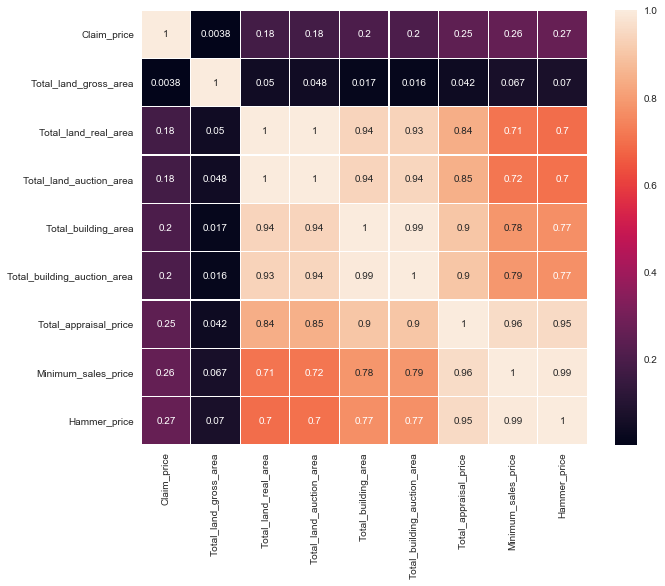

In [253]:
sns.heatmap(data[numerical_features].corr(), annot=True, linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

### Heatmap을 통한 결과해석

- 청구 금액과 총토지전체면적은 다른 feature와 관계가 없는 경향
- 최저매각가격과 낙찰가는 양의 상관관계를 가진다.
- 경매면적을 판단하기 위해서는 전체면적보다 실면적을 보는 것이 좋다.

- 감정가를 예측하기 위해서는 총 토지 실면적, 총 건물 면적을 확인하는 것이 좋다.
- 감정가와 낙찰가는 강한 양의 상관관계를 가진다.

---

In [254]:
# 4번 - 연속형 변수 5가지 선정 후 타겟 변수(Hammer price)와의 관계 시각화
''' 
<독립변수>
- Claim_price (경매 신청인의 청구 금액)
- Total_land_auction_area (총토지경매면적)
- Total_building_auction_area (총건물경매면적)
- Total_appraisal_price (총감정가)
- Minimum_sales_price (최저매각가격)

<종속변수>
- Hammer_price (낙찰가)
'''
features = list([
    'Claim_price',
    'Total_land_auction_area',
    'Total_building_auction_area',
    'Total_appraisal_price',
    'Minimum_sales_price',
    'Hammer_price'
])

# Hammer_price와 다른 feature의 관계 표현
print(data[features].corr()['Hammer_price'])

Claim_price                    0.267728
Total_land_auction_area        0.700639
Total_building_auction_area    0.772839
Total_appraisal_price          0.953464
Minimum_sales_price            0.994592
Hammer_price                   1.000000
Name: Hammer_price, dtype: float64


#### 결과 해석 
- Claim_price를 제외하고는 전반적으로 높은 양의 상관관계를 보인다.
- 경매 신청인의 청구 금액은 낙찰가에 큰 영향을 미치지 못하는 것으로 보인다.
- Minimum_sales_price가 타겟 변수와 가장 높은 양의 상관관계를 나타낸다.

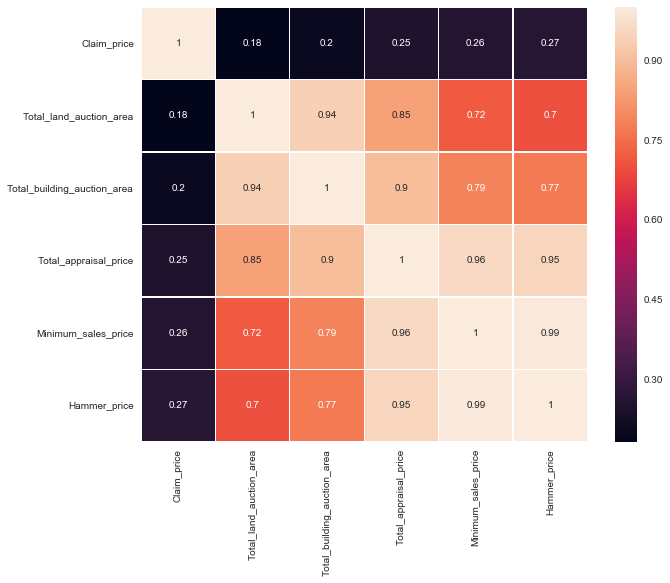

In [255]:
sns.heatmap(data[features].corr(), annot=True, linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

---

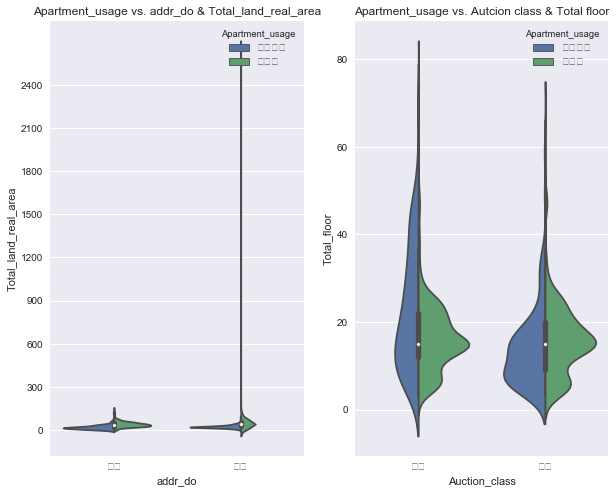

In [256]:
# 5번 - 3차원 정보(변수 3가지)를 담고 있는 도표 3개 그리기 (한글 짤림,,)
# 초기 상태의 데이터를 불러들인다.
original_data = pd.read_csv('Auction_master_train.csv')
f,ax = plt.subplots(1,2, figsize=(10,8))

# addr_do(부산/서울)
# Apartment_usage(주상복합/아파트)
# Auction_class (임의/강제)

sns.violinplot('addr_do','Total_land_real_area',hue='Apartment_usage',data=original_data, split=True,ax=ax[0])
ax[0].set_title('Apartment_usage vs. addr_do & Total_land_real_area')
ax[0].set_yticks(range(0,2700,300))

sns.violinplot('Auction_class','Total_floor',hue='Apartment_usage', data=original_data, split=True, ax=ax[1])
ax[1].set_title('Apartment_usage vs. Autcion class & Total floor')

plt.show()


#### Violin plot 해석
- 부산의 경우 아파트와 주상복합의 비율이 고른 편이다.
- 서울은 실면적의 분포가 넓지만 주상복합이 더 많은 편이다.


- 임의경매로 올라온 주상복합은 층수가 고르게 분포되어 있다.
- 아파트로 쓰이는 경우, 일반적으로 20층 내외의 건물이 많이 사용된다.

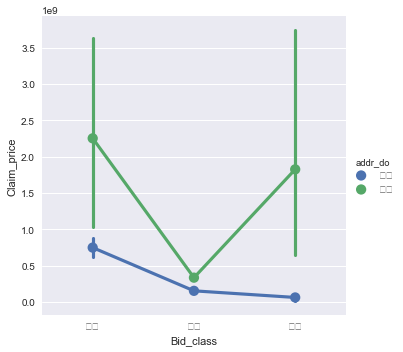

In [260]:
sns.factorplot('Bid_class','Claim_price',hue='addr_do',data=original_data)
plt.show()

- 서울의 경매 신청인이 모든 입찰 유형(개별/일반/일괄)에 대해서 청구 금액을 높게 설정하였다.